In [144]:
import numpy as np
from scipy.sparse.linalg import spsolve
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [145]:
def get_system_matrix_internal():
    #creating poison_air_matrix
    equa_num = (NT - 3) * (M - 2)
    row = np.arange(equa_num)
    col = np.array([[n * M + m for m in range(1, M - 1)] for n in range(1, NT - 2)]).reshape(equa_num)
    data1 = np.ones(equa_num)
    data2 = (div_eps0 / eps1[1:-1, 1: - 1]).reshape(equa_num)

    poison_air_matrix = (
            sp.coo_matrix((-2 * (div_dn**2 + div_dm**2) * data1, (row, col)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dm**2 * data1, (row, col + 1)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dm**2 * data1, (row, col - 1)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dn**2 * data1, (row, col + M)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dn**2 * data1, (row, col - M)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((data2, (row, col + M * N)), shape=(equa_num, 2 * N * M))
    )

    #creating germgolc_air_matrix (v = 0)
    germgolc_air_matrix = sp.coo_matrix((data1, (row, col + M * N)), shape=(equa_num, 2 * N * M))

    #creating poison_tissue_matrix
    equa_num = (N - NT - 1) * (M - 2)
    row = np.arange(equa_num)
    col = np.array([[n * M + m for m in range(1, M - 1)] for n in range(NT, N - 1)]).reshape(equa_num)
    data1 = np.ones(equa_num)
    data2 = (div_eps0 / eps2[1:-1, 1:-1]).reshape(equa_num)

    poison_tissue_matrix = (
            sp.coo_matrix((-2 * (div_dn**2 + div_dm**2) * data1, (row, col)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dm**2 * data1, (row, col + 1)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dm**2 * data1, (row, col - 1)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dn**2 * data1, (row, col + M)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dn**2 * data1, (row, col - M)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((data2, (row, col + M * N)), shape=(equa_num, 2 * N * M))
    )
    
    #creating germgolc_tissue_matrix 
#     data1 = np.array(
#         [0.25 * (diff2[1:-1, 2:] + diff2[1:-1, :-2] +
#                  diff2[2:, 1:-1] + diff2[:-2, 1:-1]).reshape(equa_num),
#          0.5 * (diff2[1:-1, 1:-1] + diff2[:-2, 1:-1]).reshape(equa_num),
#          0.5 * (diff2[1:-1, 1:-1] + diff2[2:, 1:-1]).reshape(equa_num),
#          0.5 * (diff2[1:-1, 1:-1] + diff2[1:-1, :-2]).reshape(equa_num),
#          0.5 * (diff2[1:-1, 1:-1] + diff2[1:-1, 2:]).reshape(equa_num)]
#     )
    data1 = np.array(
        [diff2[1:-1, 1:-1].reshape(equa_num),
         0.5 * (2 * diff2[1:-1, 1:-1] - diff2[2:, 1:-1] + diff2[:-2, 1:-1]).reshape(equa_num),
         0.5 * (2 * diff2[1:-1, 1:-1] + diff2[2:, 1:-1] - diff2[:-2, 1:-1]).reshape(equa_num),
         0.5 * (2 * diff2[1:-1, 1:-1] - diff2[1:-1, 2:] + diff2[1:-1, :-2]).reshape(equa_num),
         0.5 * (2 * diff2[1:-1, 1:-1] + diff2[1:-1, 2:] - diff2[1:-1, :-2]).reshape(equa_num)]
    )
    
    data2 = div_eps0 * (sigma2[1:-1, 1:-1] / eps2[1:-1, 1:-1]).reshape(equa_num)
    
    germgolc_tissue_matrix = (
            sp.coo_matrix((-2 * (div_dn**2 + div_dm**2) * data1[0] - data2, (row, col + M * N)), 
                          shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dm**2 * data1[4], (row, col + 1 + M * N)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dm**2 * data1[3], (row, col - 1 + M * N)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dn**2 * data1[2], (row, col + M + M * N)), shape=(equa_num, 2 * N * M)) +
            sp.coo_matrix((div_dn**2 * data1[1], (row, col - M + M * N)), shape=(equa_num, 2 * N * M))
    )
    
#     print('poisson equation u')
#     plt.matshow(poison_air_matrix.toarray()[:,:N*M])
#     plt.matshow(poison_tissue_matrix.toarray()[:,:N*M])
#     print('poisson equation v')
#     plt.matshow(poison_air_matrix.toarray()[:,N*M:])
#     plt.matshow(poison_tissue_matrix.toarray()[:,N*M:])
#     print('germgolc equation u')
#     plt.matshow(germgolc_air_matrix.toarray()[:,:N*M])
#     plt.matshow(germgolc_tissue_matrix.toarray()[:,:N*M])
#     print('germgolc equation v')
#     plt.matshow(germgolc_air_matrix.toarray()[:,N*M:])
#     plt.matshow(germgolc_tissue_matrix.toarray()[:,N*M:])
    return sp.vstack([poison_air_matrix, germgolc_air_matrix, poison_tissue_matrix, germgolc_tissue_matrix])


In [146]:
def Dirichlet(variable_name, coordinates, value):
    equa_num = len(coordinates)
    row = np.arange(equa_num)
    col = np.array([coo[0] * M + coo[1] for coo in coordinates])
    data = np.ones(equa_num)

    vector = value
    if variable_name == 'u':
        matrix = sp.coo_matrix((data, (row, col)), shape=(equa_num, 2 * N * M))
    elif variable_name == 'v':
        matrix = sp.coo_matrix((data, (row, col + N * M)), shape=(equa_num, 2 * N * M))

    return matrix, vector

def Newmann(variable_name, coordinates, external_normal, value):
    equa_num = len(coordinates)
    row = np.arange(equa_num)
    col = np.array([coo[0] * M + coo[1] for coo in coordinates])
    data = np.ones(equa_num)

    normal = external_normal
    vector = value * (normal[0] * dn + normal[1] * dm)
    if variable_name == 'u':
        matrix = (sp.coo_matrix((data * (normal[0] + normal[1]), (row, col)),
                                shape=(equa_num, 2 * N * M)) +
                  sp.coo_matrix((-data * (normal[0] + normal[1]), (row, col - normal[0] * M - normal[1])),
                                shape=(equa_num, 2 * N * M)))
    elif variable_name == 'v':
        matrix = (sp.coo_matrix((data * (normal[0] + normal[1]), (row, col + N * M)),
                                shape=(equa_num, 2 * N * M)) +
                  sp.coo_matrix((-data * (normal[0] + normal[1]), (row, col - normal[0] * M - normal[1] + N * M)),
                                shape=(equa_num, 2 * N * M)))
    elif variable_name == 'j':
        data_sigma = sigma_all[coordinates[:, 0], coordinates[:, 1]]
        data_diff = diff_all[coordinates[:, 0], coordinates[:, 1]]
        matrix = (sp.coo_matrix((data_sigma * (normal[0] + normal[1]), (row, col)),
                                shape=(equa_num, 2 * N * M)) +
                  sp.coo_matrix((-data_sigma * (normal[0] + normal[1]), (row, col - normal[0] * M - normal[1])),
                                shape=(equa_num, 2 * N * M)) +
                  sp.coo_matrix((data_diff * (normal[0] + normal[1]), (row, col + N * M)),
                                shape=(equa_num, 2 * N * M)) +
                  sp.coo_matrix((-data_diff * (normal[0] + normal[1]), (row, col - normal[0] * M - normal[1] + N * M)),
                                shape=(equa_num, 2 * N * M)))

    return matrix, vector

def Continiosly(variable_name, coordinates_in, coordinates_out, ratio, ratio_dif):
    equa_num = len(coordinates_in)
    row = np.arange(equa_num)
    col1 = np.array([coo[0] * M + coo[1] for coo in coordinates_in])
    col2 = np.array([coo[0] * M + coo[1] for coo in coordinates_out])

    data = np.ones(equa_num)
    vector = np.zeros(2 * equa_num)

    if variable_name == 'u':
        matrix = sp.vstack([
            (sp.coo_matrix((data, (row, col1)), shape=(equa_num, 2 * N * M)) +
             sp.coo_matrix((-ratio, (row, col2)), shape=(equa_num, 2 * N * M))),
            (sp.coo_matrix((data, (row, col1)), shape=(equa_num, 2 * N * M)) +
             sp.coo_matrix((-data, (row, col1 - M)), shape=(equa_num, 2 * N * M)) +
             sp.coo_matrix((ratio_dif, (row, col2)), shape=(equa_num, 2 * N * M)) +
             sp.coo_matrix((-ratio_dif, (row, col2 + M)), shape=(equa_num, 2 * N * M)))
        ])

    elif variable_name == 'v':
        matrix = sp.vstack([
            (sp.coo_matrix((data, (row, col1 + N * M)), shape=(equa_num, 2 * N * M)) +
             sp.coo_matrix((-ratio, (row, col2 + N * M)), shape=(equa_num, 2 * N * M))),
            (sp.coo_matrix((data, (row, col1 + N * M)), shape=(equa_num, 2 * N * M)) +
             sp.coo_matrix((-data, (row, col1 - M + N * M)), shape=(equa_num, 2 * N * M)) +
             sp.coo_matrix((ratio_dif, (row, col2 + N * M)), shape=(equa_num, 2 * N * M)) +
             sp.coo_matrix((-ratio_dif, (row, col2 + M + N * M)), shape=(equa_num, 2 * N * M)))
        ])

    return matrix, vector

In [149]:
def solver2D(boundary_conditions):
    system_matrix = get_system_matrix_internal()
    free_vector = np.zeros(system_matrix.shape[0])
    for matrix,vector in boundary_conditions:
        system_matrix = sp.vstack([system_matrix,matrix])
        free_vector = np.concatenate([free_vector,vector])
        
    uv = spsolve(system_matrix.tocsr(), free_vector).reshape(2, N, M)
    return uv[0], uv[1]

In [344]:
N=200
NT = int(N/2+1)
dn=10 ** (-9)
div_dn = 1/dn
M=200
dm=10 ** (-9)
div_dm = 1/dm
#Air [0,...,NT-2]
#Tissue [NT-1,...,N-1]

In [360]:
eps1 = 1 * np.ones((NT - 1, M))
sigma1 = 0 * np.ones((NT - 1, M))
diff1 = 0 * np.ones((NT - 1, M))

eps2 = 81 * np.ones((N - NT + 1, M))
sigma2 = 10 ** (-1) * np.ones((N - NT + 1, M))
diff2 = 10 ** (-9) * np.ones((N - NT + 1, M))

eps_all = np.concatenate([eps1, eps2])
sigma_all = np.concatenate([sigma1, sigma2])
diff_all = np.concatenate([diff1, diff2])

eps0 = 8.85 * 10 ** (-12)
div_eps0 = 1 / eps0


In [361]:
coo_air_n_start = np.array([[0, m] for m in range(M)])
coo_air_n_stop = np.array([[NT - 2, m] for m in range(M)])
coo_air_m_start = np.array([[n, 0] for n in range(0, NT - 1)])
coo_air_m_stop = np.array([[n, M - 1] for n in range(0, NT - 1)])

coo_tissue_n_start = np.array([[NT-1, m] for m in range(M)])
coo_tissue_n_stop = np.array([[N-1, m] for m in range(M)])
coo_tissue_m_start = np.array([[n, 0] for n in range(NT-1, N)])
coo_tissue_m_stop = np.array([[n, M - 1] for n in range(NT-1, N)])

el1_M = int(7 * M / 15)
el2_M = int(8 * M / 15)
ne_M = np.delete(np.arange(M),[el1_M,el2_M])
coo_air_el1 = np.array([[NT-2, el1_M]])
coo_air_el2 = np.array([[NT-2, el2_M]])
coo_air_n_stop_ne = np.array([[NT - 2, m] for m in ne_M])  
coo_tissue_el1 = np.array([[NT-1, el1_M]])
coo_tissue_el2 = np.array([[NT-1, el2_M]])
coo_tissue_n_start_ne = np.array([[NT - 1, m] for m in ne_M])  

boundary_conditions = [
#     Newmann('u',coo_air_n_start,[-1,0],np.zeros(M)),
#     Newmann('u',coo_air_m_start[1:-1],[0,-1],np.zeros(NT-3)),
#     Newmann('u',coo_air_m_stop[1:-1],[0,1],np.zeros(NT-3)),
    Dirichlet('u',coo_air_n_start,np.zeros(M)),
    Dirichlet('u',coo_air_m_start[1:-1],np.zeros(NT-3)),
    Dirichlet('u',coo_air_m_stop[1:-1],np.zeros(NT-3)),
    
    Dirichlet('v',coo_air_n_start,np.zeros(M)),
    Dirichlet('v',coo_air_m_start[1:-1],np.zeros(NT-3)),
    Dirichlet('v',coo_air_m_stop[1:-1],np.zeros(NT-3)),
    
#     Newmann('u',coo_tissue_n_stop,[1,0],np.zeros(M)),
#     Newmann('u',coo_tissue_m_start[1:-1],[0,-1],np.zeros(N-NT-1)),
#     Newmann('u',coo_tissue_m_stop[1:-1],[0,1],np.zeros(N-NT-1)),
    Dirichlet('u',coo_tissue_n_stop,np.zeros(M)),
    Dirichlet('u',coo_tissue_m_start[1:-1],np.zeros(N-NT-1)),
    Dirichlet('u',coo_tissue_m_stop[1:-1],np.zeros(N-NT-1)),
    
#     Newmann('j',coo_tissue_n_stop,[1,0],np.zeros(M)),
#     Newmann('j',coo_tissue_m_start[1:-1],[0,-1],np.zeros(N-NT-1)),
#     Newmann('j',coo_tissue_m_stop[1:-1],[0,1],np.zeros(N-NT-1)),
    Dirichlet('v',coo_tissue_n_stop,np.zeros(M)),
    Dirichlet('v',coo_tissue_m_start[1:-1],np.zeros(N-NT-1)),
    Dirichlet('v',coo_tissue_m_stop[1:-1],np.zeros(N-NT-1)),
    
    Continiosly('u',coo_air_n_stop_ne,coo_tissue_n_start_ne,np.ones(M-2),eps2[0,ne_M]/eps1[-1,ne_M]),
    Dirichlet('u',coo_air_el1,[1]),
    Dirichlet('u',coo_air_el2,[-1]),
    Dirichlet('u',coo_tissue_el1,[1]),
    Dirichlet('u',coo_tissue_el2,[-1]),
    
    Dirichlet('v',coo_air_n_stop,np.zeros(M)),
    Newmann('j',coo_tissue_n_start,[-1,0],np.zeros(M))
]

u,v = solver2D(boundary_conditions)


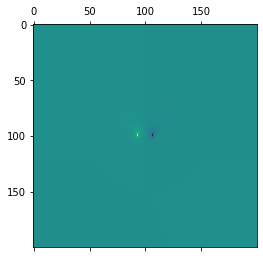

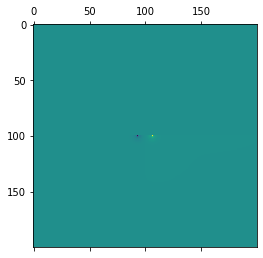

In [362]:
plt.matshow(u)
plt.matshow(v)

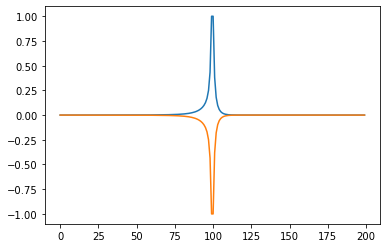

In [363]:
plt.plot(u[:,el1_M])
plt.plot(u[:,el2_M])
# plt.plot(u[NT-2])

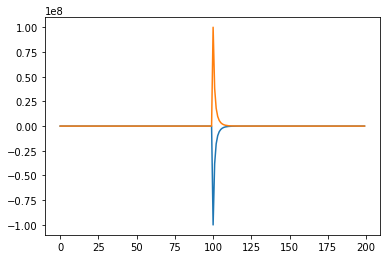

In [364]:
plt.plot(v[:,el1_M])
plt.plot(v[:,el2_M])

In [ ]:
# boundary_conditions = [
#     Dirichlet('u',coo_air_n_start,np.zeros(M)),
#     Dirichlet('u',coo_air_m_start[1:-1],np.zeros(NT-3)),
#     Dirichlet('u',coo_air_m_stop[1:-1],np.zeros(NT-3)),
    
#     Dirichlet('v',coo_air_n_start,np.zeros(M)),
#     Dirichlet('v',coo_air_m_start[1:-1],np.zeros(NT-3)),
#     Dirichlet('v',coo_air_m_stop[1:-1],np.zeros(NT-3)),
    
#     Newmann('u',coo_tissue_n_stop,[1,0],np.zeros(M)),
#     Dirichlet('u',coo_tissue_m_start[1:-1],np.ones(N-NT-1)),
#     Dirichlet('u',coo_tissue_m_stop[1:-1],-np.ones(N-NT-1)),
    
#     Newmann('j',coo_tissue_n_stop,[1,0],np.zeros(M)),
#     Newmann('j',coo_tissue_m_start[1:-1],[0,-1],np.zeros(N-NT-1)),
#     Newmann('j',coo_tissue_m_stop[1:-1],[0,1],np.zeros(N-NT-1)),
    
#     Continiosly('u',coo_air_n_stop,coo_tissue_n_start,np.ones(M),eps2[0]/eps1[-1]),
#     Dirichlet('v',coo_air_n_stop,np.zeros(M)),
#     Newmann('j',coo_tissue_n_start,[-1,0],np.zeros(M))
# ]

# boundary_conditions = [
#     Dirichlet('u',coo_air_n_start,np.zeros(M)),
#     Newmann('u',coo_air_m_start[1:-1],[0,-1],np.zeros(NT-3)),
#     Newmann('u',coo_air_m_stop[1:-1],[0,1],np.zeros(NT-3)),
    
#     Dirichlet('v',coo_air_n_start,np.zeros(M)),
#     Dirichlet('v',coo_air_m_start[1:-1],np.zeros(NT-3)),
#     Dirichlet('v',coo_air_m_stop[1:-1],np.zeros(NT-3)),
    
#     Dirichlet('u',coo_tissue_n_stop,np.ones(M)),
#     Newmann('u',coo_tissue_m_start[1:-1],[0,-1],np.zeros(N-NT-1)),
#     Newmann('u',coo_tissue_m_stop[1:-1],[0,1],np.zeros(N-NT-1)),
    
#     Dirichlet('v',coo_tissue_n_stop,np.zeros(M)),
#     Newmann('j',coo_tissue_m_start[1:-1],[0,-1],np.zeros(N-NT-1)),
#     Newmann('j',coo_tissue_m_stop[1:-1],[0,1],np.zeros(N-NT-1)),
    
#     Continiosly('u',coo_air_n_stop,coo_tissue_n_start,np.ones(M),eps2[0]/eps1[-1]),
#     Dirichlet('v',coo_air_n_stop,np.zeros(M)),
#     Newmann('j',coo_tissue_n_start,[-1,0],np.zeros(M))
# ]